<a href="https://colab.research.google.com/github/DiegoGarciaFrade/DC3_Group8/blob/main/Visualizations_data_subset_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating data set used for pipelines

# Imports

In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import shutil
from pathlib import Path
from tqdm import tqdm

from google.colab import drive
from google.colab import output

In [ ]:
# mounting the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Setting the path to images
PROJECT_ROOT_DIR = 'drive/MyDrive/'

# path for point labels
DATA_ROOT_DIR_POINT_LABELS = os.path.join(PROJECT_ROOT_DIR,'jbg060_AI_for_Good_course_Shared',
                             '01_Data', 'benthic_datasets', 'point_labels', 'SEAVIEW', 'tabular-data')

# path for masks
DATA_ROOT_DIR_MASK = os.path.join(PROJECT_ROOT_DIR,'jbg060_AI_for_Good_course_Shared',
                             '01_Data', 'benthic_datasets', 'mask_labels', 'reef_support')


# Getting images that have both point labels and corresponding masks

* Folders that store data for regions have small differencess in names:
 - example: annotations_PAC_IDN_PHL.csv and SEAVIEW_IDN_PHL

In [ ]:
# loading the csv files - point labels
region_points = ['annotations_PAC_AUS.csv', 'annotations_PAC_USA.csv', 'annotations_ATL.csv', 'annotations_PAC_IDN_PHL.csv']

# Loaded tabular data
ann_PAC_AUS = pd.read_csv(os.path.join(DATA_ROOT_DIR_POINT_LABELS, region_points[0]))
ann_PAC_USA = pd.read_csv(os.path.join(DATA_ROOT_DIR_POINT_LABELS, region_points[1]))
ann_ALT = pd.read_csv(os.path.join(DATA_ROOT_DIR_POINT_LABELS, region_points[2]))
ann_IDN_PHIL = pd.read_csv(os.path.join(DATA_ROOT_DIR_POINT_LABELS, region_points[3]))

In [ ]:
# getting the ids of images that have masks
mask_folders = ['SEAVIEW_PAC_AUS', 'SEAVIEW_PAC_USA', 'SEAVIEW_ATL', 'SEAVIEW_IDN_PHL']

# Getting the paths
path_mask_PAC_AUS = os.path.join(DATA_ROOT_DIR_MASK, mask_folders[0], 'masks_stitched')
path_mask_PAC_USA = os.path.join(DATA_ROOT_DIR_MASK, mask_folders[1], 'masks_stitched')
path_mask_ATL = os.path.join(DATA_ROOT_DIR_MASK, mask_folders[2], 'masks_stitched')
path_mask_IDN_PHL = os.path.join(DATA_ROOT_DIR_MASK, mask_folders[3], 'masks_stitched')


# Getting the ids of masks - every name file is changed into an int
mask_id_PAC_AUS = sorted([int(f.split('_')[0]) for f in os.listdir(path_mask_PAC_AUS) if f.endswith(('.jpg', '.png'))])
mask_id_PAC_USA = sorted([int(f.split('_')[0]) for f in os.listdir(path_mask_PAC_USA) if f.endswith(('.jpg', '.png'))])
mask_id_ALT = sorted([int(f.split('_')[0]) for f in os.listdir(path_mask_ATL) if f.endswith(('.jpg', '.png'))])
mask_id_IDN_PHL = sorted([int(f.split('_')[0]) for f in os.listdir(path_mask_IDN_PHL) if f.endswith(('.jpg', '.png'))])

In [ ]:
# checking for duplicates
# if the set and the list are of the same length then there are no duplicates
# all values in the tuple are "True"
# there are no duplicates
len(mask_id_PAC_AUS) == len(set(mask_id_PAC_AUS)), len(mask_id_PAC_USA) == len(set(mask_id_PAC_USA)), len(mask_id_ALT) == len(set(mask_id_ALT)), len(mask_id_IDN_PHL) == len(set(mask_id_IDN_PHL)),

(True, True, True, True)

In [ ]:
# count of iages per region
len(mask_id_PAC_AUS), len(mask_id_PAC_USA), len(mask_id_ALT), len(mask_id_IDN_PHL)

(658, 278, 659, 466)

In [ ]:
# checking for ids that have both point labels and masks
inter_PAC_AUS = set(ann_PAC_AUS['quadratid']) & set(mask_id_PAC_AUS)
inter_PAC_USA = set(ann_PAC_USA['quadratid']) & set(mask_id_PAC_USA)
inter_ALT = set(ann_ALT['quadratid']) & set(mask_id_ALT)
inter_IDN_PHL = set(ann_IDN_PHIL['quadratid']) & set(mask_id_IDN_PHL)

len(inter_PAC_AUS), len(inter_PAC_USA), len(inter_ALT), len(inter_IDN_PHL) # we found all ids that have both masks and ids

(658, 278, 659, 466)

In [ ]:
# getting the tables with images that have both point labels and images
final_PAC_AUS = ann_PAC_AUS[ann_PAC_AUS['quadratid'].isin(inter_PAC_AUS)]
final_PAC_USA = ann_PAC_USA[ann_PAC_USA['quadratid'].isin(inter_PAC_USA)]
final_PAC_ALT = ann_ALT[ann_ALT['quadratid'].isin(inter_ALT)]
final_IDN_PHL = ann_IDN_PHIL[ann_IDN_PHIL['quadratid'].isin(inter_IDN_PHL)]

# testing for ids - if some where missing
all = len(set(final_PAC_AUS['quadratid'])), len(set(final_PAC_USA['quadratid'])), len(set(final_PAC_ALT['quadratid'])), len(set(final_IDN_PHL['quadratid']))
all

(658, 278, 659, 466)

In [ ]:
def proportion(input: tuple, total: int):
'''
    Calculate the proportional values of elements in an input tuple relative to a specified total.

    This function takes a tuple of numerical values and calculates each value's proportion
    of the total sum of the tuple, scaled by the specified total. The result is a list where
    each element represents the scaled proportion of the corresponding input value.

    Parameters:
    input (tuple): A tuple of numerical values to be scaled proportionally.
    total (int): The target sum to which the values in `input` are scaled.

    Returns:
    list (List): A list of proportional values that sum up to approximately `total`,
         with each value representing a scaled proportion of each element in `input`.
'''
  samples = []
  for value in input:
    sample = (value / sum(input)) * total
    samples.append(sample)
  return samples


proportion(all, 500)
 # so let there be images
 # PAC_AUS -> 160 ,PAC_USA -> 67, PAC_ALT -> 160 , IDN_PHL -> 113 total = 500

[159.6312469674915, 67.44298884036876, 159.87384764677338, 113.05191654536632]


# Count of points per functional group per region


In [ ]:
final_PAC_AUS.groupby(['func_group'])['quadratid'].count()

,quadratid
func_group,
Algae,26864
Hard Coral,17767
Other,900
Other Invertebrates,381
Soft Coral,888


In [ ]:
final_PAC_USA.groupby(['func_group'])['quadratid'].count()

,quadratid
func_group,
Algae,12793
Hard Coral,4736
Other,1482
Other Invertebrates,189


In [ ]:
final_PAC_ALT.groupby(['func_group'])['quadratid'].count()

,quadratid
func_group,
Algae,24771
Hard Coral,4387
Other,3788
Other Invertebrates,357
Soft Coral,4497
Sponge,4150


In [ ]:
final_IDN_PHL.groupby(['func_group'])['quadratid'].count()

,quadratid
func_group,
Algae,16475
Hard Coral,11450
Other,1689
Other Invertebrates,1994
Soft Coral,2492


# Geeting count of points per image

In [ ]:
soft_coral_ids_PAC_AUS= final_PAC_AUS[final_PAC_AUS['func_group'] == 'Soft Coral']['quadratid'].unique()
soft_coral_ids_PAC_USA = final_PAC_USA[final_PAC_USA['func_group'] == 'Soft Coral']['quadratid'].unique()
soft_coral_ids_PAC_ALT = final_PAC_ALT[final_PAC_ALT['func_group'] == 'Soft Coral']['quadratid'].unique()
soft_coral_ids_IDN_PHL = final_IDN_PHL[final_IDN_PHL['func_group'] == 'Soft Coral']['quadratid'].unique()

for i in [soft_coral_ids_PAC_AUS, soft_coral_ids_PAC_USA, soft_coral_ids_PAC_ALT, soft_coral_ids_IDN_PHL]:
  print(len(i))

# Note: there are no soft corals in USA data set, thus we will focus on other regions
# we will try to balance the number of points for each region

247
0
449
184


# Preparing subset of images form every region, based on number of images that contain soft corals

In [ ]:
# Getting the dictionary of counnts of every image from a region
def get_counts_dict(data):
    """
    This function outputs a dictionary with counts of point labels for images for a region

    Parameters:
    data (pd.DataFrame): The original DataFrame.
    result (pd.DataFrame): The grouped DataFrame.

    Returns:
    result_dict (dictionary): A dictionary with counts of point labels for images for a region
    """
  result = data.groupby(['quadratid', 'func_group'])['y'].count()
  result_dict = result.unstack(fill_value=0).to_dict(orient='index')
  return result_dict


AUS_count_dict = get_counts_dict(final_PAC_AUS)
USA_count_dict = get_counts_dict(final_PAC_USA)
ALT_count_dict = get_counts_dict(final_PAC_ALT)
IDN_PHIL_count_dict = get_counts_dict(final_IDN_PHL)


In [ ]:
def update_and_normalize_counts(data_count_dict, dataframe):

"""
    Updates and normalizes the counts of point labels in a dictionary based on a DataFrame.

    This function takes in a dictionary containing counts and a DataFrame, then:
      - Updates the 'total' field for each key in the dictionary based on counts from the DataFrame.
      - Normalizes the individual counts for each key, except 'total', by dividing by the total count.

    Parameters:
    data_count_dict (dict): A dictionary where keys represent 'quadratid' values and each value is another dictionary containing label counts and a 'total' field.
    dataframe (pd.DataFrame): A DataFrame with columns 'quadratid' and 'y', where 'y' contains labels for each 'quadratid'.

    Returns:
    None: The function updates the input dictionary `data_count_dict` in place with normalized counts.
"""

    # Group the 'final_PAC_AUS' DataFrame by 'quadratid' and count the occurrences of 'y'
    total_counts = dataframe.groupby('quadratid')['y'].count().to_dict()

    # Update the 'total' field in the 'AUS_count_dict' with values from 'total_counts'
    for key in data_count_dict.keys():
        if key in total_counts:
            data_count_dict[key]['total'] = total_counts[key]

    # Normalize the counts for each key in 'AUS_count_dict'
    for key1 in data_count_dict.keys():
        total = data_count_dict[key1].get('total', 0)  # Get the total for the current quadratid, default to 0
        # Normalize the values, skipping the 'total' key
        if total > 0:
            for key2 in data_count_dict[key1].keys():
                if key2 != 'total':
                    data_count_dict[key1][key2] /= total
        else:
            # If total is 0, set all other counts to 0
            for key2 in data_count_dict[key1].keys():
                if key2 != 'total':
                    data_count_dict[key1][key2] = 0


# AUS

In [ ]:
update_and_normalize_counts(AUS_count_dict, final_PAC_AUS)

In [ ]:
ids_soft_aus = set()
for key in AUS_count_dict.keys():
  if AUS_count_dict[key]['Soft Coral'] >= 0.06 :
    ids_soft_aus.add(key)

print(len(ids_soft_aus))


87


In [ ]:
ids_hard_aus = set()
for key in AUS_count_dict.keys():
  if AUS_count_dict[key]['Hard Coral'] >= 0.45 and AUS_count_dict[key]['Hard Coral'] <= 0.7:
    ids_hard_aus.add(key)

print(len(ids_hard_aus))

82


In [ ]:
selected_AUS_IDS = list(ids_soft_aus.union(ids_hard_aus))
len(selected_AUS_IDS)

162

# USA


In [ ]:
update_and_normalize_counts(USA_count_dict, final_PAC_USA)

In [ ]:
ids_hard_usa = set()
for key in USA_count_dict.keys():
  if USA_count_dict[key]['Hard Coral'] >= 0.35 and USA_count_dict[key]['Hard Coral'] <= 0.9:
    ids_hard_usa.add(key)

print(len(ids_hard_usa))

65


In [ ]:
selected_USA_IDS = list(ids_hard_usa)
len(selected_USA_IDS)

65

# ALT


In [ ]:
update_and_normalize_counts(ALT_count_dict, final_PAC_ALT)

In [ ]:
ids_soft_alt = set()
for key in ALT_count_dict.keys():
  if ALT_count_dict[key]['Soft Coral'] >= 0.25 and ALT_count_dict[key]['Soft Coral'] <= 0.9 :
    ids_soft_alt.add(key)

print(len(ids_soft_alt))

85


In [ ]:
ids_hard_alt = set()
for key in ALT_count_dict.keys():
  if ALT_count_dict[key]['Hard Coral'] >= 0.25 and ALT_count_dict[key]['Hard Coral'] <= 1:
    ids_hard_alt.add(key)

print(len(ids_hard_alt))

78


In [ ]:
selected_ALT_IDS = list(ids_soft_alt.union(ids_hard_alt))
len(selected_ALT_IDS)

162

# IDN_PHL



In [ ]:
update_and_normalize_counts(IDN_PHIL_count_dict, final_IDN_PHL)

In [ ]:
ids_soft_idn_phil = set()
for key in IDN_PHIL_count_dict.keys():
  if IDN_PHIL_count_dict[key]['Soft Coral'] >= 0.15 and IDN_PHIL_count_dict[key]['Soft Coral'] <= 1 :
    ids_soft_idn_phil.add(key)

print(len(ids_soft_idn_phil))

73


In [ ]:
ids_hard_idn_phil = set()
for key in IDN_PHIL_count_dict.keys():
  if IDN_PHIL_count_dict[key]['Hard Coral'] >= 0.5 and IDN_PHIL_count_dict[key]['Hard Coral'] <= 0.6:
    ids_hard_idn_phil.add(key)

print(len(ids_hard_idn_phil))

58


In [ ]:
selected_IDN_PHIL = list(ids_soft_idn_phil.union(ids_hard_idn_phil))
len(selected_IDN_PHIL)

130

# Creating the tables that will contain ids that satisfy the treshhold of proportional presence of soft corals

In [ ]:
# AUS
modified_PAC_AUS = final_PAC_AUS[final_PAC_AUS['quadratid'].isin(selected_AUS_IDS)]
# USA
modified_PAC_USA = final_PAC_USA[final_PAC_USA['quadratid'].isin(selected_USA_IDS)]
# ALT
modified_PAC_ALT = final_PAC_ALT[final_PAC_ALT['quadratid'].isin(selected_ALT_IDS)]
# IDN_PHIL
modified_IDN_PHL = final_IDN_PHL[final_IDN_PHL['quadratid'].isin(selected_IDN_PHIL)]

# Creating dictionary for visualization of all data points from selected regions

In [ ]:
# takes a subset of images from regions: used for visulaizations
grouped_AUS = modified_PAC_AUS.groupby(['func_group'])['quadratid'].count().reset_index()

grouped_USA = modified_PAC_USA.groupby(['func_group'])['quadratid'].count().reset_index()

grouped_ALT = modified_PAC_ALT.groupby(['func_group'])['quadratid'].count().reset_index()

grouped_IDN_PHL = modified_IDN_PHL.groupby(['func_group'])['quadratid'].count().reset_index()

In [ ]:
# takes all images from regions: used for visulaizations

dirty_AUS = final_PAC_AUS.groupby(['func_group'])['quadratid'].count().reset_index()

dirty_USA = final_PAC_USA.groupby(['func_group'])['quadratid'].count().reset_index()

dirty_ATL = final_PAC_ALT.groupby(['func_group'])['quadratid'].count().reset_index()

dirty_IDN_PHL = final_IDN_PHL.groupby(['func_group'])['quadratid'].count().reset_index()

# Getting the images for the poster

In [ ]:
import pandas as pd

def summarize_func_groups(df, group_col, value_col, groups_to_keep):
    """
    This function keeps the specified groups and sums the rest into an "Others" category.

    Parameters:
    df (pd.DataFrame): The original DataFrame.
    group_col (str): The name of the column that contains the functional groups.
    value_col (str): The name of the column that contains the values to sum.
    groups_to_keep (list): A list of groups to keep unchanged.

    Returns:
    pd.DataFrame: A new DataFrame with the specified groups and an "Others" row.
    """
    # Filter to keep only specified groups
    df_new = df[df[group_col].isin(groups_to_keep)].copy()

    # Sum the other categories
    others_sum = df[~df[group_col].isin(groups_to_keep)][value_col].sum()

    # Create a new row for "Others"
    others_row = pd.DataFrame({group_col: ['Other'], value_col: [others_sum]})

    # Concatenate the new "Others" row with df_new
    df_final = pd.concat([df_new, others_row], ignore_index=True)

    return df_final


In [ ]:
# AUS
summarized_AUS = summarize_func_groups(grouped_AUS, 'func_group', 'quadratid', ['Hard Coral', 'Soft Coral'])
summarized_AUS = summarized_AUS.set_index('func_group')['quadratid'].to_dict()
summarized_AUS

{'Hard Coral': 4305, 'Soft Coral': 624, 'Other': 5871}

In [ ]:
# USA
summarized_USA = summarize_func_groups(grouped_USA, 'func_group', 'quadratid', ['Hard Coral'])

dummy_row = pd.DataFrame({'func_group': ['Soft Coral'], 'quadratid': [0]})

    # Concatenate the new "Others" row with df_new
summarized_USA = pd.concat([summarized_USA, dummy_row], ignore_index=True)
summarized_USA = summarized_USA .set_index('func_group')['quadratid'].to_dict()
summarized_USA

{'Hard Coral': 3101, 'Other': 1699, 'Soft Coral': 0}

In [ ]:
# ALT
summarized_ALT = summarize_func_groups(grouped_ALT, 'func_group', 'quadratid', ['Hard Coral', 'Soft Coral'])
summarized_ALT = summarized_ALT.set_index('func_group')['quadratid'].to_dict()
summarized_ALT

{'Hard Coral': 2560, 'Soft Coral': 2687, 'Other': 5753}

In [ ]:
# IDN PHL
summarized_IDN_PHL = summarize_func_groups(grouped_IDN_PHL, 'func_group', 'quadratid', ['Hard Coral', 'Soft Coral'])
summarized_IDN_PHL = summarized_IDN_PHL.set_index('func_group')['quadratid'].to_dict()
summarized_IDN_PHL


{'Hard Coral': 3245, 'Soft Coral': 2117, 'Other': 4238}

# Crazy - data set that uses all images from regions, used for visualizations


In [ ]:
crazy_AUS = summarize_func_groups(dirty_AUS, 'func_group', 'quadratid', ['Hard Coral', 'Soft Coral'])
crazy_AUS = crazy_AUS.set_index('func_group')['quadratid'].to_dict()
crazy_AUS

{'Hard Coral': 17767, 'Soft Coral': 888, 'Other': 28145}

In [ ]:
crazy_USA = summarize_func_groups(dirty_USA, 'func_group', 'quadratid', ['Hard Coral', 'Soft Coral'])

dummy_row = pd.DataFrame({'func_group': ['Soft Coral'], 'quadratid': [0]})

    # Concatenate the new "Others" row with df_new
crazy_USA = pd.concat([crazy_USA, dummy_row], ignore_index=True)

crazy_USA = crazy_USA.set_index('func_group')['quadratid'].to_dict()
crazy_USA

{'Hard Coral': 4736, 'Other': 14464, 'Soft Coral': 0}

In [ ]:
crazy_ATL = summarize_func_groups(dirty_ATL, 'func_group', 'quadratid', ['Hard Coral', 'Soft Coral'])
crazy_ATL = crazy_ATL.set_index('func_group')['quadratid'].to_dict()
crazy_ATL

{'Hard Coral': 4387, 'Soft Coral': 4497, 'Other': 33066}

In [ ]:
crazy_IDN_PHL = summarize_func_groups(dirty_IDN_PHL, 'func_group', 'quadratid', ['Hard Coral', 'Soft Coral'])
crazy_IDN_PHL= crazy_IDN_PHL.set_index('func_group')['quadratid'].to_dict()
crazy_IDN_PHL

{'Hard Coral': 11450, 'Soft Coral': 2492, 'Other': 20158}

# Preparing the counts of all points summed over all regions

In [ ]:
result = {}
for key in crazy_AUS:
    # Sum the values from each dictionary for the current key
    result[key] = crazy_USA[key] + crazy_ATL[key] + crazy_IDN_PHL[key] + crazy_AUS[key]

result

{'Hard Coral': 38340, 'Soft Coral': 7877, 'Other': 95833}

# Visualisation

Text(0, 0.5, 'Counts')

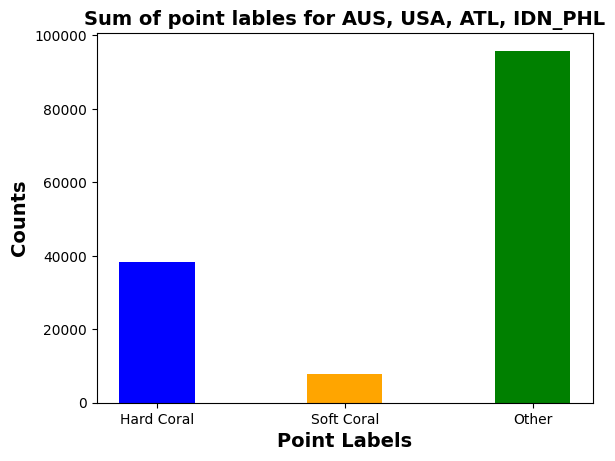

In [ ]:
fig, ax = plt.subplots()

courses = list(result.keys())
values = list(result.values())

# creating the bar plot
plt.bar(courses, values, width = 0.4,color=['blue', 'orange', 'green'])
plt.title('Sum of point lables for AUS, USA, ATL, IDN_PHL', weight='bold', fontsize=14)
plt.xlabel('Point Labels', weight='bold', fontsize=14)
plt.ylabel('Counts', weight='bold', fontsize=14)

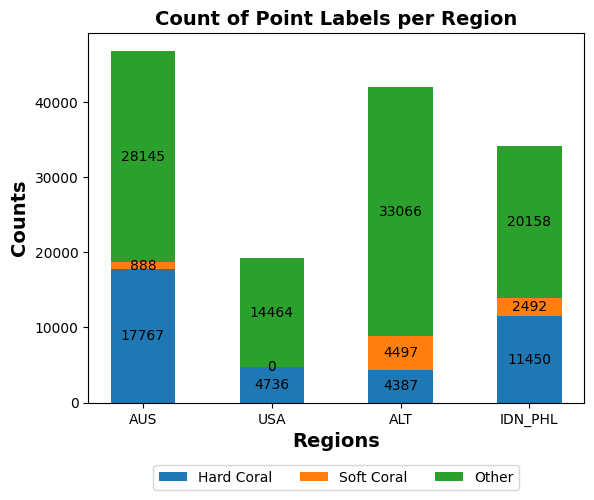

In [ ]:
# graph for all counts of points all regions
regions = ('AUS', 'USA', 'ALT', 'IDN_PHL')

label_counts  = {
    "Hard Coral": np.array([crazy_AUS["Hard Coral"], crazy_USA["Hard Coral"],
                           crazy_ATL["Hard Coral"], crazy_IDN_PHL["Hard Coral"]]),
    "Soft Coral": np.array([crazy_AUS["Soft Coral"], crazy_USA["Soft Coral"],
                           crazy_ATL["Soft Coral"], crazy_IDN_PHL["Soft Coral"]]),
    "Other" : np.array([crazy_AUS["Other"], crazy_USA["Other"],
                           crazy_ATL["Other"], crazy_IDN_PHL["Other"]])
}

width = 0.5


fig, ax = plt.subplots()
bottom = np.zeros(len(regions))  # Use len(regions) to create an appropriate shape

# Iterate over the label counts
for label, counts in label_counts.items():
    ax.bar(regions, counts, width, label=label, bottom=bottom)
    # Add individual counts on top of each segment
    for i in range(len(counts)):
        ax.text(i, bottom[i] + counts[i] / 2, str(int(counts[i])), ha='center', va='center')  # Adjust position
    bottom += counts

ax.set_title("Count of Point Labels per Region", fontsize=14,  weight='bold')
ax.set_xlabel("Regions", fontsize=14,  weight='bold')  # Set x-axis label
ax.set_ylabel("Counts", fontsize=14,  weight='bold')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)


plt.savefig("stacked_bar_chart.png", format='png', dpi=300, bbox_inches='tight')  # Change file name and format as needed

plt.show()


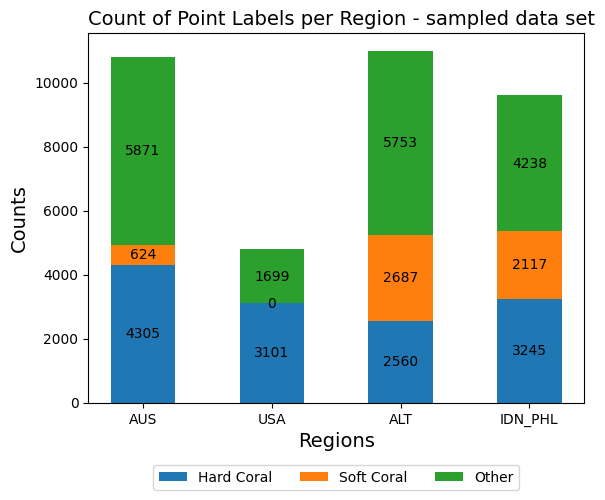

In [ ]:
# visualisation of smaller data set

regions = ('AUS', 'USA', 'ALT', 'IDN_PHL')

label_counts  = {
    "Hard Coral": np.array([summarized_AUS["Hard Coral"], summarized_USA["Hard Coral"],
                           summarized_ALT["Hard Coral"], summarized_IDN_PHL["Hard Coral"]]),
    "Soft Coral": np.array([summarized_AUS["Soft Coral"], summarized_USA["Soft Coral"],
                           summarized_ALT["Soft Coral"], summarized_IDN_PHL["Soft Coral"]]),
    "Other" : np.array([summarized_AUS["Other"], summarized_USA["Other"],
                           summarized_ALT["Other"], summarized_IDN_PHL["Other"]])
}

width = 0.5


fig, ax = plt.subplots()
bottom = np.zeros(len(regions))  # Use len(regions) to create an appropriate shape

# Iterate over the label counts
for label, counts in label_counts.items():
    ax.bar(regions, counts, width, label=label, bottom=bottom)
    # Add individual counts on top of each segment
    for i in range(len(counts)):
        ax.text(i, bottom[i] + counts[i] / 2, str(int(counts[i])), ha='center', va='center')  # Adjust position
    bottom += counts

ax.set_title("Count of Point Labels per Region - sampled data set", fontsize=14, loc='left')
ax.set_xlabel("Regions", fontsize=14)  # Set x-axis label
ax.set_ylabel("Counts", fontsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)


plt.savefig("stacked_bar_chart.png", format='png', dpi=300, bbox_inches='tight')  # Change file name and format as needed

plt.show()

# Code below was not used in the final part of the project

# Creating folders that contain the subset of the data, which will be used in the pipeline

In [ ]:
# getting the ids of images that have masks
mask_folders = ['SEAVIEW_PAC_AUS', 'SEAVIEW_PAC_USA', 'SEAVIEW_ATL', 'SEAVIEW_IDN_PHL']

# Getting the paths
path_mask_PAC_AUS = os.path.join(DATA_ROOT_DIR_MASK, mask_folders[0], 'masks_stitched')
path_mask_PAC_USA = os.path.join(DATA_ROOT_DIR_MASK, mask_folders[1], 'masks_stitched')
path_mask_ATL = os.path.join(DATA_ROOT_DIR_MASK, mask_folders[2], 'masks_stitched')
path_mask_IDN_PHL = os.path.join(DATA_ROOT_DIR_MASK, mask_folders[3], 'masks_stitched')


# Getting the ids of masks - every name file is changed into an int
mask_id_PAC_AUS = sorted([int(f.split('_')[0]) for f in os.listdir(path_mask_PAC_AUS) if f.endswith(('.jpg', '.png'))])
mask_id_PAC_USA = sorted([int(f.split('_')[0]) for f in os.listdir(path_mask_PAC_USA) if f.endswith(('.jpg', '.png'))])
mask_id_ALT = sorted([int(f.split('_')[0]) for f in os.listdir(path_mask_ATL) if f.endswith(('.jpg', '.png'))])
mask_id_IDN_PHL = sorted([int(f.split('_')[0]) for f in os.listdir(path_mask_IDN_PHL) if f.endswith(('.jpg', '.png'))])

In [ ]:
all_mask_ids = set(selected_AUS_IDS + selected_USA_IDS + selected_ALT_IDS + selected_IDN_PHIL)

target_directory = Path('/content/masks_set_2')

target_directory.mkdir(parents=True, exist_ok=True)


# Function to copy images from source to target directory
def copy_images_from_folder(source_folder, ids):
    source_folder = Path(source_folder)  # Ensure source_folder is a Path object
    for f in os.listdir(source_folder):
        if f.endswith(('.jpg', '.png')):  # Check if file is an image
            # Extract ID from filename
            file_id = int(f.split('_')[0])
            if file_id in ids:  # If ID is in the list, copy the file
                source_file_path = source_folder / f
                destination_file_path = target_directory / f
                shutil.copy(source_file_path, destination_file_path)  # Copy the file
                print(f"Copied '{f}' to '{target_directory}'")

copy_images_from_folder(path_mask_PAC_AUS, all_mask_ids)
copy_images_from_folder(path_mask_PAC_USA, all_mask_ids)
copy_images_from_folder(path_mask_ATL, all_mask_ids)
copy_images_from_folder(path_mask_IDN_PHL, all_mask_ids)

Copied '10001008301_mask.png' to '/content/masks_set_2'
Copied '10001008501_mask.png' to '/content/masks_set_2'
Copied '10001010601_mask.png' to '/content/masks_set_2'
Copied '10001018502_mask.png' to '/content/masks_set_2'
Copied '10001020402_mask.png' to '/content/masks_set_2'
Copied '10001018802_mask.png' to '/content/masks_set_2'
Copied '10001020902_mask.png' to '/content/masks_set_2'
Copied '10001021302_mask.png' to '/content/masks_set_2'
Copied '10001021501_mask.png' to '/content/masks_set_2'
Copied '10001021702_mask.png' to '/content/masks_set_2'
Copied '10001021602_mask.png' to '/content/masks_set_2'
Copied '10001022402_mask.png' to '/content/masks_set_2'
Copied '10001021902_mask.png' to '/content/masks_set_2'
Copied '10001023202_mask.png' to '/content/masks_set_2'
Copied '10001023602_mask.png' to '/content/masks_set_2'
Copied '10001024402_mask.png' to '/content/masks_set_2'
Copied '10001024102_mask.png' to '/content/masks_set_2'
Copied '10001024202_mask.png' to '/content/masks

In [ ]:
# loading the csv files - point labels
region_img = ['PAC_AUS', 'PAC_USA', 'ATL', 'PAC_IDN_PHL']


DATA_ROOT_DIR_IMAGES = os.path.join(PROJECT_ROOT_DIR,'jbg060_AI_for_Good_course_Shared',
                             '01_Data', 'benthic_datasets', 'point_labels', 'SEAVIEW')

# Getting the paths
path_img_PAC_AUS = os.path.join(DATA_ROOT_DIR_IMAGES, region_img[0])
path_img_PAC_USA = os.path.join(DATA_ROOT_DIR_IMAGES, region_img[1])
path_img_ATL = os.path.join(DATA_ROOT_DIR_IMAGES, region_img[2])
path_img_IDN_PHL = os.path.join(DATA_ROOT_DIR_IMAGES, region_img[3])


len(os.listdir(path_img_PAC_AUS)), len(os.listdir(path_img_PAC_USA)), len(os.listdir(path_img_ATL)), len(os.listdir(path_img_IDN_PHL)), len(os.listdir('/content/masks_set_2'))

(2657, 1153, 1407, 1638, 519)

In [ ]:
target_directory = Path('/content/images_set_2')


target_directory.mkdir(parents=True, exist_ok=True)


# Function to copy images from source to target directory
def copy_images_from_folder(source_folder, ids):
    source_folder = Path(source_folder)  # Ensure source_folder is a Path object
    for f in os.listdir(source_folder):
        if f.endswith(('.jpg', '.png')):  # Check if file is an image
            # Extract ID from filename
            file_id = int(f.split('.')[0])
            if file_id in ids:  # If ID is in the list, copy the file
                source_file_path = source_folder / f
                destination_file_path = target_directory / f
                shutil.copy(source_file_path, destination_file_path)  # Copy the file
                print(f"Copied '{f}' to '{target_directory}'")

# estimated running time 10 minutes
copy_images_from_folder(path_img_PAC_AUS, all_mask_ids)
copy_images_from_folder(path_img_PAC_USA, all_mask_ids)
copy_images_from_folder(path_img_ATL, all_mask_ids)
copy_images_from_folder(path_img_IDN_PHL, all_mask_ids)

Copied '15025028601.jpg' to '/content/images_set_2'
Copied '15025031601.jpg' to '/content/images_set_2'
Copied '15025043901.jpg' to '/content/images_set_2'
Copied '15025045101.jpg' to '/content/images_set_2'
Copied '15025045201.jpg' to '/content/images_set_2'
Copied '15025045901.jpg' to '/content/images_set_2'
Copied '15025046201.jpg' to '/content/images_set_2'
Copied '15025049901.jpg' to '/content/images_set_2'
Copied '15025051101.jpg' to '/content/images_set_2'
Copied '15025060601.jpg' to '/content/images_set_2'
Copied '15025060701.jpg' to '/content/images_set_2'
Copied '15025060801.jpg' to '/content/images_set_2'
Copied '35023131301.jpg' to '/content/images_set_2'
Copied '35023131201.jpg' to '/content/images_set_2'
Copied '35023131401.jpg' to '/content/images_set_2'
Copied '35023131901.jpg' to '/content/images_set_2'
Copied '35023132001.jpg' to '/content/images_set_2'
Copied '35023132201.jpg' to '/content/images_set_2'
Copied '35023132601.jpg' to '/content/images_set_2'
Copied '3502